$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 07 - Concrete Syntax

Bor-Yuh Evan Chang  
Tuesday, September 17, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

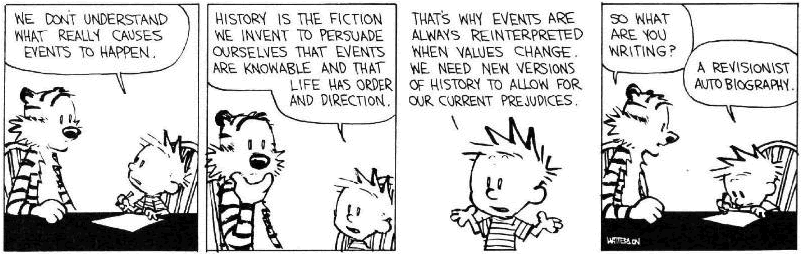

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting07-concrete-syntax.pdf)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/concrete-syntax.html)

## Announcements

-   HW 2 due this Friday 9/20 6pm
    -   Jupyter assignment

## Today

-   Preview HW 2
-   [Concrete
    Syntax](https://csci3155.cs.colorado.edu/pppl-course/book/concrete-syntax.html)
-   Triage Your Questions
    -   Lab 1?
-   Revisit and Go Deeper On:
    -   Inductive Data Types (Meeting 06), if time permits

## Questions?

-   Review:
    -   What’s an *inductive data type*?

## Questions?

## What is the purpose of a programming language specification?

We want to describe a programming language unambigously so that everyone
understands how to use it.

## Who uses a language specification?

Language designer, language implementer, and language user.

## What is the difference between syntax and semantics?

Can a given syntax have two different semantics (in different
languages)?

Informally,

-   *Syntax* is the form of programs (e.g., expressions).
-   *Semantics* is the meaning of programs (e.g., expressions). How
    programs evaluate.

## What is the difference between concrete and abstract syntax?

Concrete syntax is the surface structure of a language (i.e.,
sequences/strings).

Abstract syntax is the deep structure of a language (i.e., trees/terms).

# Concrete Syntax

## Formal Language Terminology

In formal language theory, a *language* $L$ is …

… a set of strings of characters in some alphabet $\Sigma$ (i.e., a
subset of $\Sigma^*$)

For example,

$$
\begin{array}{rrl}
\Sigma & \stackrel{\text{\tiny def}}{=}& \{ \texttt{a}, \texttt{b} \}
\\
L_1 & \stackrel{\text{\tiny def}}{=}& \{ \texttt{aa}, \texttt{bb} \}
\\
L_2 & \stackrel{\text{\tiny def}}{=}& \{ \texttt{a}, \texttt{aa}, \texttt{aaa}, \ldots \}
\end{array}
$$

## Formal Language Terminology

A *sentence* is …

… a string of a language

$$
\texttt{aa} \in L_1
$$

## Grammars

A (context-free) grammar describes …







BNF (Backus-Naur Form) is …

… (context-free) languages

… a notation for (context-free) languages

## Grammars

A grammar consists *terminals*, *non-terminals*, and *productions*:

$$
N \mathrel{::=}\alpha_1 \mid\alpha_2 \mid\cdots
$$

where $N \in \mathcal{N}$ is a non-terminal and
$\alpha \in (\Sigma \cup\mathcal{N})^\ast$.

## Lexical versus Syntactic

A *lexeme* is …







A *token* is …

… a sequence of characters that form a syntactic unit (lowest level
unit)

… a category of lexemes

For example,

-   An $\mathit{if}$ token consists of the lexeme \[`i`, `f`\]
-   A $\mathit{num}$ token has possible lexemes { \[`0`\], \[`1`\],
    \[`4`, `2`\] }

A *lexer* (i.e., lexical analyzer)

-   groups characters into *lexemes* and classifies them into *tokens*

A *parser* (i.e., syntactic analyzer)

-   recognizes sequences of *tokens*

## Generators versus Recognizers

A grammar can be viewed as either generating a the set of strings in a
language $L$ or recognizing whether a given string $s$ is in a language
$L$.

## Example Grammars

$$
e \mathrel{::=}n \mid e + e \mid e * e
$$

-   What are the terminals and non-terminals?
-   What is $n$? It is a terminal. If it is a meta-variable, then it
    stands for a element in some set and must stated elsewhere.
-   What is the alphabet?

Each non-terminal describes an inductively-defined language.

## Parsing Derivations

Give a *parsing derivation* for `1 + 2 * 3` with
$e \mathrel{::=}n \mid e + e \mid e * e$.

## Parse Trees

Give a *parse tree* for `1 + 2 * 3` with
$e \mathrel{::=}n \mid e + e \mid e * e$.

## Ambiguity

What should `1 + 2 * 3` evaluate to (i.e., what is the semantics of
`1 + 2 * 3`)?

This string can be thought of as either `(1 + 2) * 3` or `1 + (2 * 3)`.

The same string can be read in two different ways!

“Ambiguous grammars need parentheses!”

## Ambiguity

Give another parsing derivation for `1 + 2 * 3` with
$e \mathrel{::=}n \mid e + e \mid e * e$.

## Ambiguity

Give the corresponding parse tree as the previous derivation for
`1 + 2 * 3` with $e \mathrel{::=}n \mid e + e \mid e * e$.

What’s the “parenthesization”?

## Resolving Ambiguity: Associativity

$$
e \mathrel{::=}n \mid e - e
$$

Is this grammar ambiguous?

Consider `7 - 3 - 2`

What does `7 - 3 - 2` evaluate to?

`(7 - 3) - 2` or `7 - (3 - 2)`?

**Exercise:** Can we rewrite the grammar so that we get left
associativity?

Is the following unambiguous and what associativity does it have?

$$
e \mid n \mid e - n
$$

It has left recursion. Can we rewrite the grammar so that we get right
associativity?

## Resolving Ambiguity: Precedence

$$
e \mathrel{::=}n \mid n + e \mid n * e
$$

Is this grammar ambiguous?

Is it what we want (intuitively)?

Consider `7 + 8 * 5` and `7 * 8 + 5`.

**Exercise:** Write parse trees.

## Resolving Ambiguity: Precedence

Consider the ambiguous grammar again:

$$
e \mathrel{::=}n \mid e + e \mid e * e
$$

What does this grammar do?

$$
\begin{array}{rrl}
e & \mathrel{::=}& t \mid t + e \\
t & \mathrel{::=}& n \mid n * t
\end{array}
$$

**Exercise:** Write parse trees for `7 + 8 * 5` and `7 * 8 + 5` using
both grammars.

## Bonus: Resolving Ambiguity

$$
\begin{array}{rrl}
s & \mathrel{::=}& \mathit{ifstmt} \mid\cdots \\
\mathit{ifstmt} & \mathrel{::=}& \texttt{if} \; e \; \texttt{then} \; s \\
                & \mid& \texttt{if} \; e \; \texttt{then} \; s \; \texttt{else} \; s
\end{array}
$$

Ambiguous?

## Write Grammars

Write a grammar for a language that has the string $\texttt{aa}$.

## Write Grammars

Write a grammar for a language that has an even number of
$\texttt{a}$’s.

## Write Grammars

Write a grammar for a language that has an odd number of $\texttt{a}$’s.

## Write Grammars

Write a grammar that generates matching open and close braces `{` `}`.